In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize']=(6,4)
sns.set_style('whitegrid')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('insurance_fraud.csv')

In [5]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [6]:
df.shape

(15420, 33)

In [7]:
# df.nunique()

In [8]:
df = df.rename(columns={'FraudFound_P': 'FraudFound'})

In [9]:
# Statistics of quantitative variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


In [10]:
# Statistics of qualitative variables
df.describe(include=['O']).T

,count,unique,top,freq
Month,15420,12,Jan,1411
DayOfWeek,15420,7,Monday,2616
Make,15420,19,Pontiac,3837
AccidentArea,15420,2,Urban,13822
DayOfWeekClaimed,15420,8,Monday,3757
MonthClaimed,15420,13,Jan,1446
Sex,15420,2,Male,13000
MaritalStatus,15420,4,Married,10625
Fault,15420,2,Policy Holder,11230
PolicyType,15420,9,Sedan - Collision,5584


In [11]:
# Delete row that has MonthClaimed as '0' entered
df.drop(df.loc[df['MonthClaimed']=='0'].index, inplace=True)

In [12]:
# Dropping the columns that are not necessary for analysis
df.drop(['PolicyNumber','RepNumber','Year'], axis=1, inplace=True)

### ANALYSIS

In [13]:
# Import necessary libraries

from scipy.stats import chi2_contingency

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [14]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'BasePolicy'],
      dtype='object')

In [15]:
# Select all numeric variables
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
num_cols

['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'FraudFound',
 'Deductible',
 'DriverRating']

In [16]:
# Select all categorical variables
var_cols = df.select_dtypes(include=['object']).columns.tolist()
var_cols

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

In [17]:
# One-hot encode categorical features
df1 = pd.get_dummies(df, columns=['Month','DayOfWeek','Make','AccidentArea','DayOfWeekClaimed', 'MonthClaimed', 
                                 'Sex','MaritalStatus','Fault','PolicyType','VehicleCategory',
                                 'VehiclePrice','Days_Policy_Accident','Days_Policy_Claim','PastNumberOfClaims',
                                 'AgeOfVehicle','AgeOfPolicyHolder', 'PoliceReportFiled','WitnessPresent', 
                                 'AgentType', 'NumberOfSuppliments','AddressChange_Claim', 'NumberOfCars',  
                                 'BasePolicy'])

In [18]:
df1.shape

(15419, 143)

In [19]:
X = df1.drop('FraudFound', axis=1)
y = df1['FraudFound']

In [20]:
X.shape

(15419, 142)

## SelectKBest

In [21]:
X.head()

,WeekOfMonth,WeekOfMonthClaimed,Age,Deductible,DriverRating,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Make_Accura,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,Make_Mercury,Make_Nisson,Make_Pontiac,Make_Porche,Make_Saab,Make_Saturn,Make_Toyota,Make_VW,AccidentArea_Rural,AccidentArea_Urban,DayOfWeekClaimed_Friday,DayOfWeekClaimed_Monday,DayOfWeekClaimed_Saturday,DayOfWeekClaimed_Sunday,DayOfWeekClaimed_Thursday,DayOfWeekClaimed_Tuesday,DayOfWeekClaimed_Wednesday,MonthClaimed_Apr,MonthClaimed_Aug,MonthClaimed_Dec,MonthClaimed_Feb,MonthClaimed_Jan,MonthClaimed_Jul,MonthClaimed_Jun,MonthClaimed_Mar,MonthClaimed_May,MonthClaimed_Nov,MonthClaimed_Oct,MonthClaimed_Sep,Sex_Female,Sex_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Policy Holder,Fault_Third Party,PolicyType_Sedan - All Perils,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,VehiclePrice_20000 to 29000,VehiclePrice_30000 to 39000,VehiclePrice_40000 to 59000,VehiclePrice_60000 to 69000,VehiclePrice_less than 20000,VehiclePrice_more than 69000,Days_Policy_Accident_1 to 7,Days_Policy_Accident_15 to 30,Days_Policy_Accident_8 to 15,Days_Policy_Accident_more than 30,Days_Policy_Accident_none,Days_Policy_Claim_15 to 30,Days_Policy_Claim_8 to 15,Days_Policy_Claim_more than 30,PastNumberOfClaims_1,PastNumberOfClaims_2 to 4,PastNumberOfClaims_more than 4,PastNumberOfClaims_none,AgeOfVehicle_2 years,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,AgeOfPolicyHolder_16 to 17,AgeOfPolicyHolder_18 to 20,AgeOfPolicyHolder_21 to 25,AgeOfPolicyHolder_26 to 30,AgeOfPolicyHolder_31 to 35,AgeOfPolicyHolder_36 to 40,AgeOfPolicyHolder_41 to 50,AgeOfPolicyHolder_51 to 65,AgeOfPolicyHolder_over 65,PoliceReportFiled_No,PoliceReportFiled_Yes,WitnessPresent_No,WitnessPresent_Yes,AgentType_External,AgentType_Internal,NumberOfSuppliments_1 to 2,NumberOfSuppliments_3 to 5,NumberOfSuppliments_more than 5,NumberOfSuppliments_none,AddressChange_Claim_1 year,AddressChange_Claim_2 to 3 years,AddressChange_Claim_4 to 8 years,AddressChange_Claim_no change,AddressChange_Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,5,1,21,300,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1
1,3,4,34,400,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
2,5,2,47,400,3,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
3,2,1,65,400,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0

In [22]:
# Select the best 55 features using f_classif score
skbest = SelectKBest(score_func=f_classif, k=55)
X_new = skbest.fit_transform(X,y)
print(X_new.shape)

features = X.columns[(skbest.get_support())]
print(features)

(15419, 55)
Index(['Age', 'Deductible', 'Month_Aug', 'Month_Mar', 'Month_Nov',
       'Make_Accura', 'Make_VW', 'AccidentArea_Rural', 'AccidentArea_Urban',
       'MonthClaimed_Aug', 'MonthClaimed_Dec', 'MonthClaimed_Jul',
       'MonthClaimed_May', 'MonthClaimed_Nov', 'Sex_Female', 'Sex_Male',
       'Fault_Policy Holder', 'Fault_Third Party',
       'PolicyType_Sedan - All Perils', 'PolicyType_Sedan - Collision',
       'PolicyType_Sedan - Liability', 'PolicyType_Sport - Collision',
       'PolicyType_Utility - All Perils', 'VehicleCategory_Sedan',
       'VehicleCategory_Sport', 'VehicleCategory_Utility',
       'VehiclePrice_20000 to 29000', 'VehiclePrice_30000 to 39000',
       'VehiclePrice_less than 20000', 'VehiclePrice_more than 69000',
       'Days_Policy_Accident_more than 30', 'Days_Policy_Accident_none',
       'Days_Policy_Claim_more than 30', 'PastNumberOfClaims_2 to 4',
       'PastNumberOfClaims_more than 4', 'PastNumberOfClaims_none',
       'AgeOfVehicle_4 years', 'A

In [23]:
X_new.shape

(15419, 55)

In [24]:
# Split the data into train and test and validation , random_state=1 , random_state=1

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state=1) #, stratify=y

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.1, random_state=1)

In [25]:
# Scale the date

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_valid = scaler.fit_transform(X_valid)

In [26]:
# Choosing the best classifier algorithm

lr = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

In [27]:
classifiers = [('Logistic Regression', lr),
              ('Decision Tree Classifier', dt),
              ('KNearest Neighbor', knn),
              ('Random Forest Classifier', rf),
              ('Gradient Boosting Classifier', gb)]

Logistic Regression
Test Accuracy score: 0.944 ROC AUC: 0.781
Train Accuracy score: 0.938
[[2909    2]
 [ 170    3]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2911
           1       0.60      0.02      0.03       173

    accuracy                           0.94      3084
   macro avg       0.77      0.51      0.50      3084
weighted avg       0.93      0.94      0.92      3084

----------------------------------------------------------------------------------------------------
Decision Tree Classifier
Test Accuracy score: 0.895 ROC AUC: 0.563
Train Accuracy score: 0.993
[[2730  181]
 [ 143   30]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2911
           1       0.14      0.17      0.16       173

    accuracy                           0.89      3084
   macro avg       0.55      0.56      0.55      3084
weighted avg       0.90      0.89      0.90      3084

------

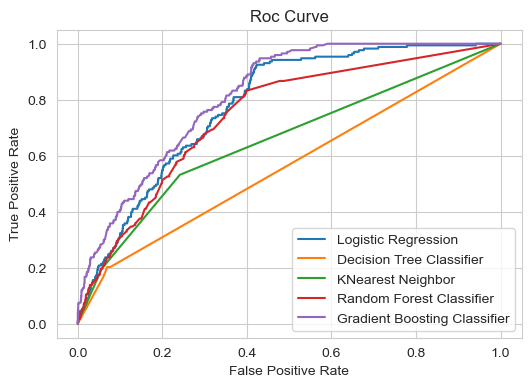

In [28]:
# Models without Adasyn

for model_name, model in classifiers:
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, predict)
    y_prob = model.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, y_prob)
    
    train_predict = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predict)
    
    print(model_name) 
    print('Test Accuracy score:', round(accuracy,3), 'ROC AUC:', round(roc_auc,3))
    print('Train Accuracy score:', round(train_accuracy,3))
    print(confusion_matrix(y_test, predict)) 
    print(classification_report(y_test, predict))
    print("-"*100)
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    
    plt.plot(false_positive_rate, true_positive_rate, label=model_name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curve')
    plt.legend();

## Feature Importance

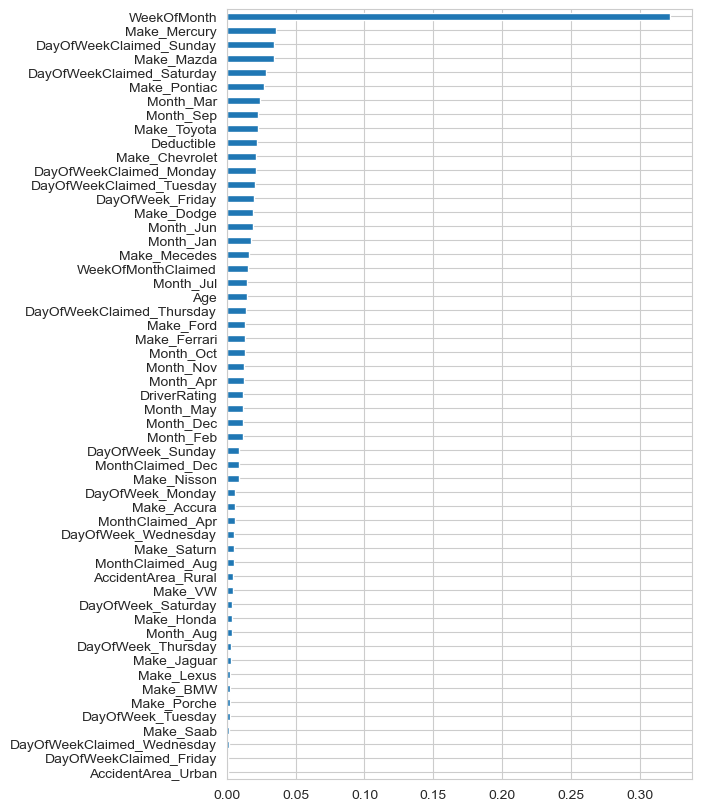

In [29]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

featureimp = pd.Series(rf.feature_importances_, index=X.columns[:55])
sorted_featureimp = featureimp.sort_values()

# print(featureimp.sort_values(ascending=False))
plt.figure(figsize=(6,10))
featureimp.sort_values(ascending=False)
sorted_featureimp.plot(kind='barh')
plt.show();

## Random Forests Model

In [30]:
X.shape[0]

15419

RF Accuracy Score: 0.945
RF ROC AUC Score:  0.7735597285957392
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2911
           1       0.77      0.06      0.11       173

    accuracy                           0.95      3084
   macro avg       0.86      0.53      0.54      3084
weighted avg       0.94      0.95      0.92      3084



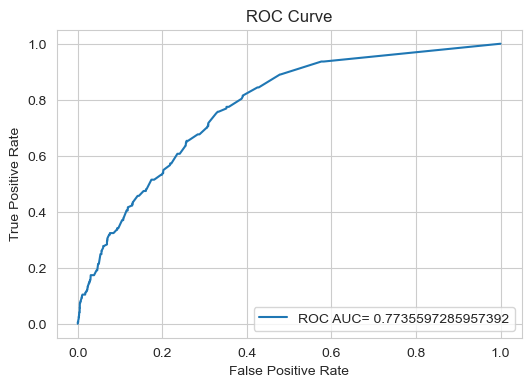

In [31]:
rf = RandomForestClassifier(oob_score=True, class_weight={0:1, 1:5}, random_state=42, max_samples=3000)

rf.fit(X_train, y_train)
predict_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predict_rf)

y_prob_rf = rf.predict_proba(X_test)[:,1]
rocauc_rf = roc_auc_score(y_test, y_prob_rf)

#Comparing train and test predictions 
predict_rf = rf.predict(X_train)
acc_rf = accuracy_score(y_train, predict_rf)
                           
print('RF Accuracy Score:', round(acc_rf,3)) 
# print('Train Accuracy Score:', round(train_acc,3))   
print('RF ROC AUC Score: ', rocauc_rf)


print('Classification Report:\n', classification_report(y_test, predict))

# Print ROC AUC curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob_rf)

plt.plot(false_positive_rate, true_positive_rate, label='ROC AUC= '+ str(rocauc_rf))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show;



In [32]:
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

## KNN Parameter Tuning

In [33]:
# # Find the n_neighbors of minimum error rate
error_rate = []
for i in range(1,75):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
print('Minimum error:', min(error_rate), "at K =", error_rate.index(min(error_rate)))

Minimum error: 0.055771725032425425 at K = 18


KNN Accuracy score: 0.942 ROC AUC: 0.705
Confusion Matrix:
[[2900   11]
 [ 169    4]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2911
           1       0.27      0.02      0.04       173

    accuracy                           0.94      3084
   macro avg       0.61      0.51      0.51      3084
weighted avg       0.91      0.94      0.92      3084



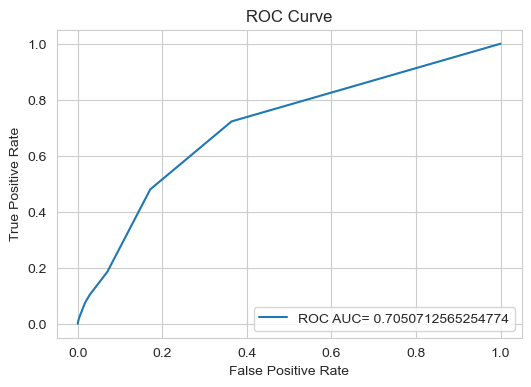

In [34]:
# # Define and fit classifier
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=11, weights='uniform')
knn.fit(X_train, y_train)

# predict
predict1 = knn.predict(X_test)

# Define metrics of accuracy 
accuracy1 = accuracy_score(y_test, predict1)

# Predict probability and define the area under the ROC Curve
y_prob1 = knn.predict_proba(X_test)[:,1]
roc_auc1 = roc_auc_score(y_test, y_prob1)

print('KNN Accuracy score:', round(accuracy1,3), 'ROC AUC:', round(roc_auc1,3))

print('Confusion Matrix:')
print(confusion_matrix(y_test, predict1))

print(classification_report(y_test, predict1))


# Define ROC AUC metric
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob1)

# Plot ROC Curve
plt.plot(false_positive_rate, true_positive_rate, label='ROC AUC= '+ str(roc_auc1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show();

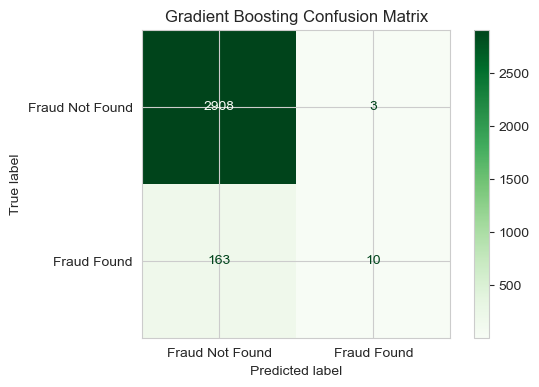

In [35]:
# from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(gb, X_test, y_test, display_labels=['Fraud Not Found', 'Fraud Found'], cmap='Greens')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

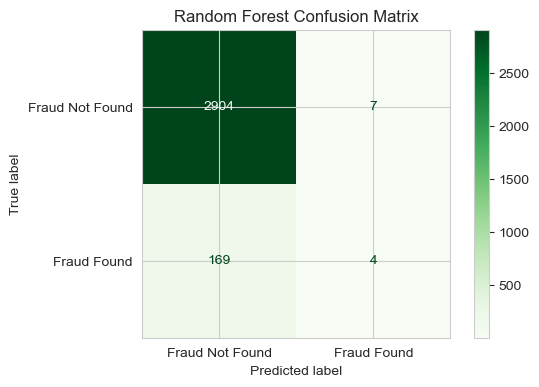

In [36]:
fig = plot_confusion_matrix(rf, X_test, y_test, display_labels=['Fraud Not Found', 'Fraud Found'], cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.show()

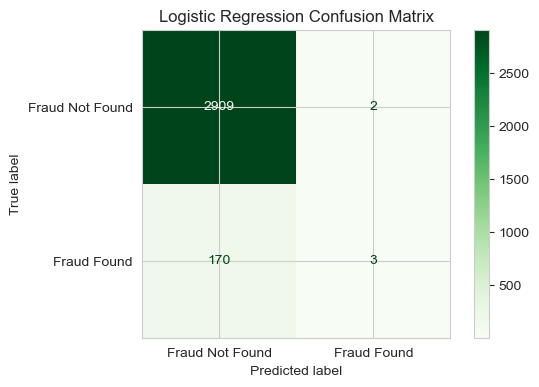

In [37]:
fig = plot_confusion_matrix(lr, X_test, y_test, display_labels=['Fraud Not Found', 'Fraud Found'], cmap='Greens')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

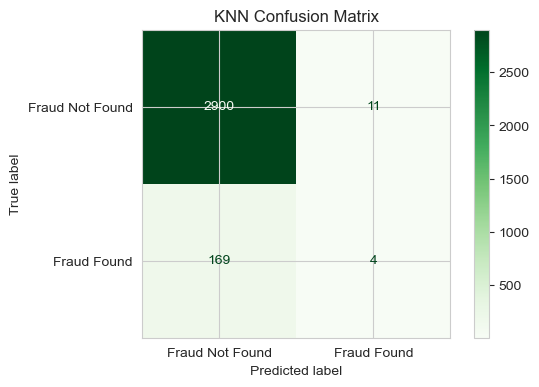

In [38]:
fig = plot_confusion_matrix(knn, X_test, y_test, display_labels=['Fraud Not Found', 'Fraud Found'], cmap='Greens')
plt.title('KNN Confusion Matrix')
plt.show()

## Logistic Regression

In [39]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predict = lr.predict(X_test)
accuracy = accuracy_score(y_test, predict)
y_prob = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_prob)

train_predict = lr.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predict)

print('Test Accuracy score:', round(accuracy,3), 'ROC AUC:', round(roc_auc,3))
print('Train Accuracy score:', round(train_accuracy,3))
print(confusion_matrix(y_test, predict)) 
print(classification_report(y_test, predict))

Test Accuracy score: 0.944 ROC AUC: 0.816
Train Accuracy score: 0.938
[[2909    2]
 [ 170    3]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2911
           1       0.60      0.02      0.03       173

    accuracy                           0.94      3084
   macro avg       0.77      0.51      0.50      3084
weighted avg       0.93      0.94      0.92      3084



## Gradient Boosting Model

GB Accuracy score:  0.9461738002594033
GB ROC AUC score:  0.81616769558561
Confusion Matrix:
[[2908    3]
 [ 163   10]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2911
           1       0.77      0.06      0.11       173

    accuracy                           0.95      3084
   macro avg       0.86      0.53      0.54      3084
weighted avg       0.94      0.95      0.92      3084



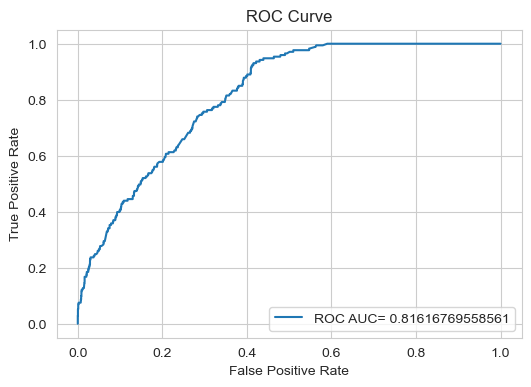

In [40]:
# Define the classifier
gb = GradientBoostingClassifier(n_estimators = 100) # takes longer, changing n_estimators changes outcome very little

# Fit the classifier
gb.fit(X_train, y_train)

# Predict
predict_gb = gb.predict(X_test)

# Define metrics of accuracy 
accuracy_gb = accuracy_score(y_test, predict_gb)

# Predict probability and define the area under the ROC Curve
y_prob_gb = gb.predict_proba(X_test)[:,1]
rocauc_gb = roc_auc_score(y_test, y_prob_gb)


print('GB Accuracy score: ', accuracy_gb)
print('GB ROC AUC score: ',rocauc_gb)


print('Confusion Matrix:')
print(confusion_matrix(y_test, predict_gb))

print(classification_report(y_test, predict_gb))

# Print ROC AUC curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob_gb)

plt.plot(false_positive_rate, true_positive_rate, label='ROC AUC= '+ str(rocauc_gb))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show;


In [46]:
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

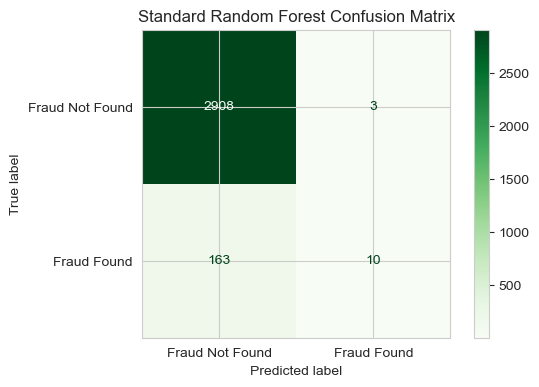

In [47]:
# from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(gb, X_test, y_test, display_labels=['Fraud Not Found', 'Fraud Found'], cmap='Greens')
plt.title('Standard Random Forest Confusion Matrix')
plt.show()

## Predicting with holdout validation data

In [48]:
print(list(np.where(y_valid==0)))

[array([   1,    2,    3, ..., 1231, 1232, 1233])]


In [49]:
print(list(np.where(y_valid==1)))

[array([   0,    4,   47,   48,   51,   68,   69,  105,  116,  118,  120,
        145,  171,  174,  195,  229,  231,  232,  246,  257,  267,  293,
        294,  297,  310,  318,  324,  335,  365,  367,  395,  416,  442,
        468,  478,  504,  511,  553,  639,  680,  718,  754,  764,  768,
        797,  806,  807,  833,  838,  890,  903,  909,  928,  934,  938,
        969, 1003, 1004, 1039, 1092, 1102, 1119, 1122, 1129, 1134, 1157,
       1161, 1183, 1205, 1228])]


In [50]:
# predict with Logistic Regression
lr_predictions = lr.predict(X_valid)

In [51]:
i = 768
print('Actual:','No Fraud Found' if y_valid.iloc[i]==0 else 'Fraud Found')

print('Predicted:', 'Fraud Found' if lr_predictions[i] >= 0.5 else 'No Fraud Found' )

Actual: Fraud Found
Predicted: No Fraud Found


In [52]:
# Predict with Gradient Boosting
predictions = gb.predict(X_valid)

In [53]:
i = 51
print('Actual:','No Fraud Found' if y_valid.iloc[i]==0 else 'Fraud Found')

print('Predicted:', 'Fraud Found' if predictions[i] >= 0.5 else 'No Fraud Found' )

Actual: Fraud Found
Predicted: Fraud Found


In [54]:
i = 20
print('Actual:','No Fraud Found' if y_valid.iloc[i]==0 else 'Fraud Found')

print('Predicted:', 'Fraud Found' if predictions[i] >= 0.5 else 'No Fraud Found' )

Actual: No Fraud Found
Predicted: No Fraud Found
